COVID-19 Survey

1) Checking the size of the dataset and its metadata at the link https://github.com/owid/covid-19-data/tree/master/public/data


In [1]:
 
import pandas as pd

path_file = r'C:\Users\amede\Desktop\EPICODE\Python\Esame pratico Python\owid-covid-data.csv'
csvcovid = pd.read_csv(path_file)

# displaying the size and metadata of the dataset
csvcovid.head(), csvcovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402703 entries, 0 to 402702
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    402703 non-null  object 
 1   continent                                   383445 non-null  object 
 2   location                                    402703 non-null  object 
 3   date                                        402703 non-null  object 
 4   total_cases                                 363712 non-null  float64
 5   new_cases                                   391526 non-null  float64
 6   new_cases_smoothed                          390296 non-null  float64
 7   total_deaths                                341117 non-null  float64
 8   new_deaths                                  391897 non-null  float64
 9   new_deaths_smoothed                         390667 non-null  float64
 

(  iso_code continent     location        date  total_cases  new_cases  \
 0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
 1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
 2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
 3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
 4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
 
    new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
 0                 NaN           NaN         0.0                  NaN  ...   
 1                 NaN           NaN         0.0                  NaN  ...   
 2                 NaN           NaN         0.0                  NaN  ...   
 3                 NaN           NaN         0.0                  NaN  ...   
 4                 NaN           NaN         0.0                  NaN  ...   
 
    male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
 0          

2)  Find the total number of cases that occurred on that same continent, without considering any locations in the dataset that do not belong to any continent.


In [15]:
 
import pandas as pd
path_file = r'C:\Users\amede\Desktop\EPICODE\Python\Esame pratico Python\owid-covid-data.csv'

csvcovid = pd.read_csv(path_file)

total_continent_cases = csvcovid.groupby('continent')['total_cases'].sum().reset_index()

# I rename the columns for clarity
total_continent_cases.columns = ['Continent', 'Total Cases']

# I change the numeric formatting and sort from the descending point of view.
pd.options.display.float_format = '{:,.0f}'.format

total_continent_cases = total_continent_cases.sort_values(by='Total Cases', ascending=False)

print(total_continent_cases)

       Continent     Total Cases
1           Asia 228,954,707,160
2         Europe 217,297,142,082
3  North America 117,517,610,361
5  South America  68,197,033,820
0         Africa  13,604,754,780
4        Oceania  10,444,623,390


3)  Regarding total cases, I am required to write code for which, given two variables containing the names of continents, I compare the following relative statistical descriptors: maximum value, mean, and percentage to the number of total cases in the world (also calculated on locations without continent indication).

In [19]:
 
import pandas as pd

path_file =  r'C:\Users\amede\Desktop\EPICODE\Python\Esame pratico Python\owid-covid-data.csv'
csvcovid = pd.read_csv(path_file)

# Filter rows without 'total_cases'
csvcovid = csvcovid.dropna(subset=['total_cases'])

# I find the global total cases
global_total_cases = csvcovid['total_cases'].sum()

# Creating a function to compute statistics for a given continent
def get_continent_statistics(continent_name):
    data_continent = csvcovid[csvcovid['continent'] == continent_name]
    cases_max = data_continent['total_cases'].max()
    cases_medium = data_continent['total_cases'].mean()
    cases_total = data_continent['total_cases'].sum()
    percentage_global = (cases_total/global_total_cases) * 100
    return cases_max, cases_medium, percentage_global

# I declare these variables as continents
continent1 = 'Asia'
continent2 = 'Europe'

# I get the statistics on the continents
continent_statistics1 = get_continent_statistics(continent1)
continent_statistics2 = get_continent_statistics(continent2)

# I display the statistics
print(f"Statistics for {continent1}")
print(f"Maximum cases: {continent_statistics1[0]:,.0f}")
print(f"Average cases: {continent_statistics1[1]:,.0f}")
print(f"Percentage of global cases: {continent_statistics1[2]:.2f}%\n")

print(f"Statistics for {continent2}")
print(f"Maximum cases: {continent_statistics2[0]:,.0f}")
print(f"Average cases: {continent_statistics2[1]:,.0f}")
print(f"Percentage of global cases: {continent_statistics2[2]:.2f}%\n")

Statistics for Asia
Maximum cases: 99,357,895
Average cases: 3,327,540
Percentage of global cases: 8.24%

Statistics for Europe
Maximum cases: 38,997,490
Average cases: 2,762,451
Percentage of global cases: 7.82%



4) Select data for Italy in 2022 and illustrate the evolution of total cases with respect to the date using an appropriate graph. Then, present the number of new cases with respect to the date (filtering the data if necessary). Finally, construct a graph describing the trend in the cumulative sum of new cases in 2022, discussing any similarities with the trend in the number of total cases

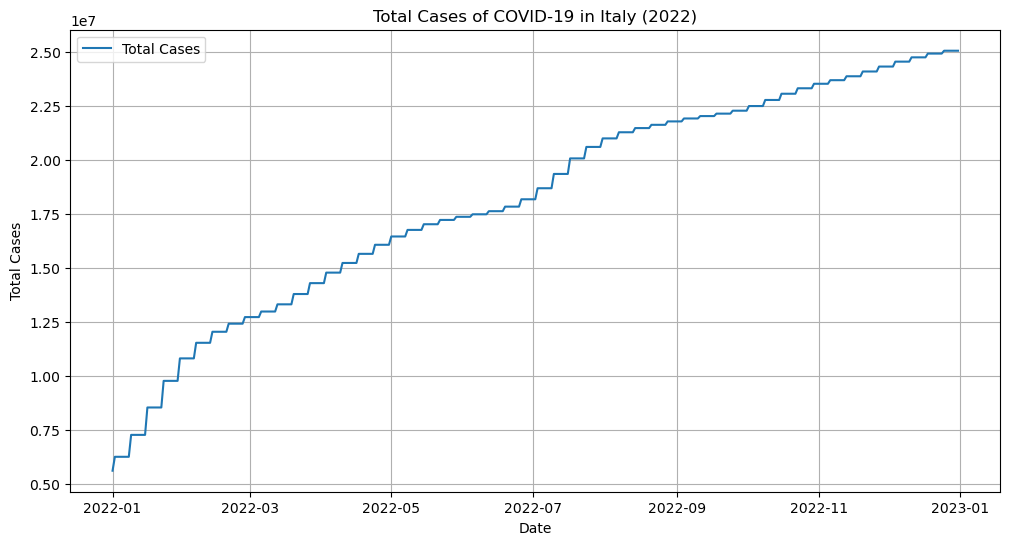

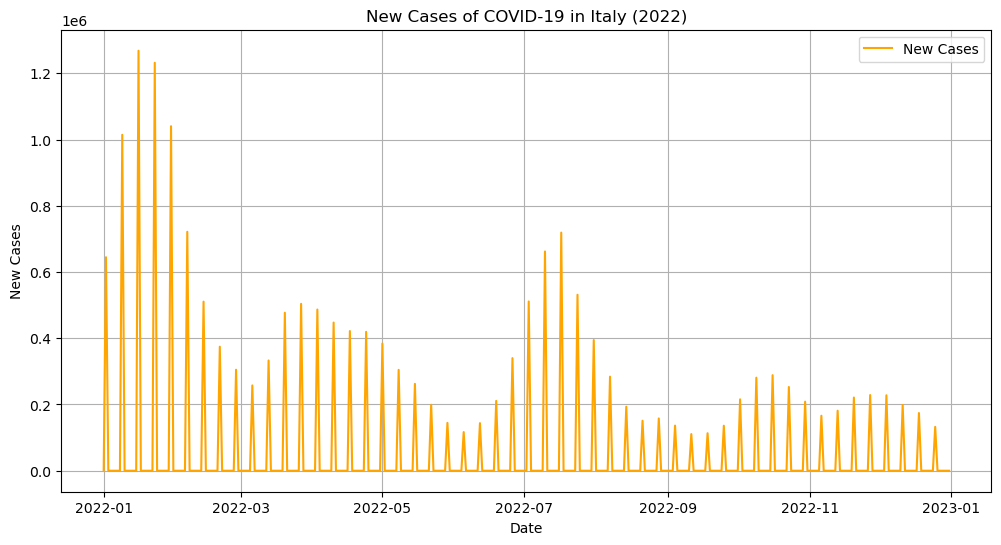

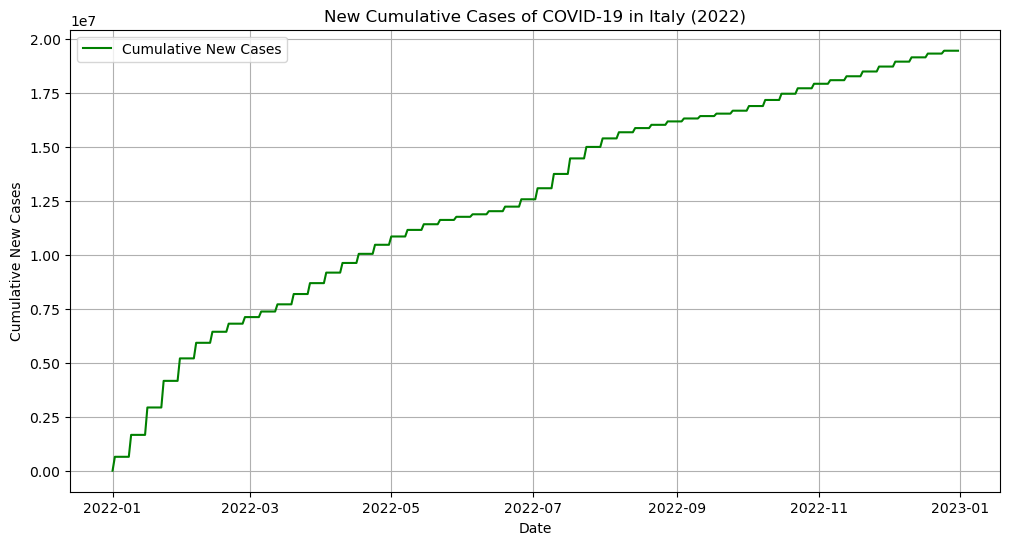

The trend in cumulative new cases closely follows the trend in total cases, as expected. Both graphs show a continuous increase in cases over time.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

path_file =  r'C:\Users\amede\Desktop\EPICODE\Python\Esame pratico Python\owid-covid-data.csv'
csvcovid = pd.read_csv(path_file)

# Filter the data for Italy in 2022.
csvcovid['date'] = pd.to_datetime(csvcovid['date'])
data_italia_2022 = csvcovid[(csvcovid['location'] == 'Italy') & (csvcovid['date'].dt.year == 2022)].copy()

# Plot the total instances over time
plt.figure(figsize=(12, 6))
plt.plot(data_italia_2022['date'], data_italia_2022['total_cases'], label='Total Cases')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total Cases of COVID-19 in Italy (2022)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the new cases over time
plt.figure(figsize=(12, 6))
plt.plot(data_italia_2022['date'], data_italia_2022['new_cases'], label='New Cases', color='orange')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('New Cases of COVID-19 in Italy (2022)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the cumulative sum of new cases over time.
data_italia_2022['cumulative_new_cases'] = data_italia_2022['new_cases'].cumsum()
plt.figure(figsize=(12, 6))
plt.plot(data_italia_2022['date'], data_italia_2022['cumulative_new_cases'], label='Cumulative New Cases', color='green')
plt.xlabel('Date')
plt.ylabel('Cumulative New Cases')
plt.title('New Cumulative Cases of COVID-19 in Italy (2022)')
plt.legend()
plt.grid(True)
plt.show()

 

# Compare trends
total_cases = data_italia_2022['total_cases']
new_cumulative_cases = data_italia_2022['cumulative_new_cases']
comment = "The trend in cumulative new cases closely follows the trend in total cases, as expected. Both graphs show a continuous increase in cases over time."
print(comment)


5) Regarding the nations of Italy, Germany, and France, we show in a boxplot the difference between these nations regarding the number of patients in intensive care units (ICUs) from May 2022 (inclusive) to April 2023 (inclusive), writing a brief commentary on it.

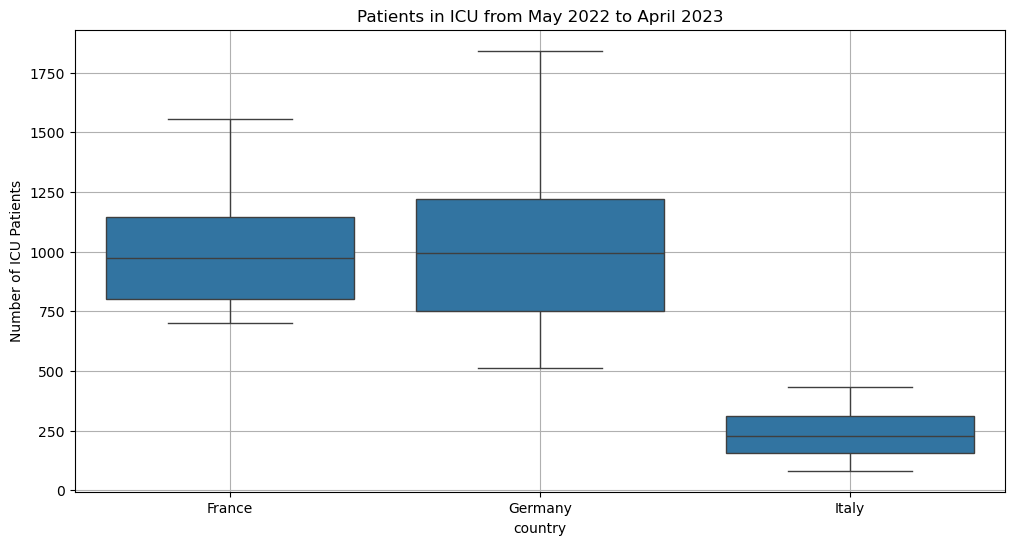


The boxplot illustrates the distribution of the number of ICU patients for Italy, Germany and France from May 2022 to April 2023.
- The median number of ICU patients appears to vary between countries.
- Germany shows a wider interquartile range (IQR) than Italy and France, indicating greater variability in the number of ICU patients.
- Italy and France have relatively similar medians and IQRs, with fewer outliers than Germany.
Overall, the boxplot suggests differences in ICU patient numbers among these countries, reflecting the various health responses and impacts the pandemic had during this period.



In [24]:
 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path_file = r'C:\Users\amede\Desktop\EPICODE\Python\Esame pratico Python\owid-covid-data.csv'
csvcovid = pd.read_csv(path_file)

# I convert the 'date' column to 'datetime' format.
csvcovid['date'] = pd.to_datetime(csvcovid['date'])

# Filter data for Italy, Germany, and France from May 2022 to April 2023.
date_start = '2022-05-01'
date_end = '2023-04-30'
data_filtered = csvcovid[(csvcovid['date'] >= date_start) & (csvcovid['date'] <= date_end) & (csvcovid['location'].isin(['Italy', 'Germany', 'France']))]

# I create a boxplot for the patients in the ICU.
plt.figure(figsize=(12, 6))
sns.boxplot(x='location', y='icu_patients', data = data_filtered)
plt.xlabel('country')
plt.ylabel ('Number of ICU Patients')
plt.title ('Patients in ICU from May 2022 to April 2023')
plt.grid(True)
plt.show()

# short comment based on boxplot
comment = """
The boxplot illustrates the distribution of the number of ICU patients for Italy, Germany and France from May 2022 to April 2023.
- The median number of ICU patients appears to vary between countries.
- Germany shows a wider interquartile range (IQR) than Italy and France, indicating greater variability in the number of ICU patients.
- Italy and France have relatively similar medians and IQRs, with fewer outliers than Germany.
Overall, the boxplot suggests differences in ICU patient numbers among these countries, reflecting the various health responses and impacts the pandemic had during this period.
"""
print(comment)

6) Regarding the nations of Germany, France, Italy and Spain in 2023, I show the sum of hospitalized patients for each.

In [27]:
 
import pandas as pd

path_file = r'C:\Users\amede\Desktop\EPICODE\Python\Esame pratico Python\owid-covid-data.csv'
csvcovid = pd.read_csv(path_file)

# I extract the year from the 'date' column.
csvcovid['year'] = pd.to_datetime(csvcovid['date']).dt.year

# I select only rows for 2023 and Italy, France, Spain, Germany
data_2023 = csvcovid[(csvcovid['year'] == 2023) & (csvcovid['location'].isin(['Italy', 'France', 'Spain', 'Germany']))]

# I calculate the sum of hospitalized patients for each country and put them in descending order
sum_hospitalized_patients = data_2023.groupby('location')['hosp_patients'].sum()
sum_patients_hospitalized = sum_hospitalized_patients.sort_values(ascending=False)

print(sum_patients_hospitalized)


location
France    1,382,574
Italy     1,175,272
Spain       354,602
Germany           0
Name: hosp_patients, dtype: float64
